# Определение перспективного тарифа для телеком компании

Необходимо изучить ввыодные данные, подготовить их для удобных вычислений, посчитать метрики, проверить гипотезы, сделать выводу.

#### Откроем файлы с данными и изучим общую информацию

In [159]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

for data in [calls, internet, messages, tariffs, users]:
    print(display(data),data.info())


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None None


Загрузили 5 таблиц и посмотрели информацию по ним. В столбце churn_date много пропусков, это означает, что клиент еще не перестал пользоваться тарифом. Все столбцы с датами имеют тип объект, необходимо перевести их в дату. 
В таблице calls много звонков с продолжительностью 0.0 минут. Надо проверить, что с этими значаениями можно сделать:

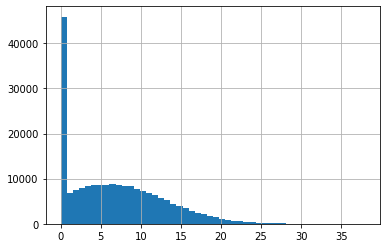

In [160]:
calls['duration'].hist(bins=50) #строю гистрограмму продолжительности звонков

Звонков продолжительностью 0.0 минут 40000. В условии сказано, что оператор округляет все значения до минут, но как можно заменить в info, там есть значения меньше минуты и дробные значения. Их надо округлить в большую сторону. 

In [161]:
calls['duration'] = calls['duration'].apply(np.ceil)

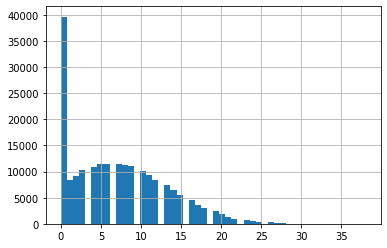

In [162]:
calls['duration'].hist(bins=50) #построим гистрограмму после окргуления.

Количество звонков продолжительностью 0 минут немного снизилось. Также пропали некоторые значения продолжительности.
Нулевые значения могут говорить о том, что соединение между абонентами не было установленно, то есть фактически звонок не состоялся. Эти данные не должны повлиять на экономику тарифа. Можно их удалить.

In [163]:
calls['duration']=calls['duration'].replace(0.0,np.nan) #заменил нулевые значения на NaN
calls['duration']=calls['duration'].dropna() #удалил строки с NaN

Построим гистрограмму с новыми данными:

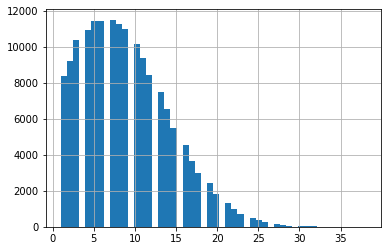

In [164]:
calls['duration'].hist(bins=50)

В таблице internet в столбце mb_used тоже есть неокругленные значения. Видимо какая-то ошибка в сборе данных. Округлю их вправо:

In [165]:
internet['mb_used']=internet['mb_used'].apply(np.ceil)

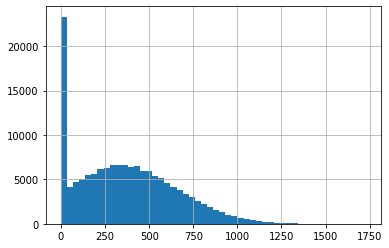

In [166]:
internet['mb_used'].hist(bins=50)

Сессий с нулевым потреблением траффика больше 20000. Также как и в случае с продолжительностью звонка, это означает, что фактически абонент в интернет не выходил, эти данные не повлияют на экономику тарифа. Удалю строки с нулями таким же способом:

In [167]:
internet['mb_used']=internet['mb_used'].replace(0, np.nan)
internet['mb_used']=internet['mb_used'].dropna()

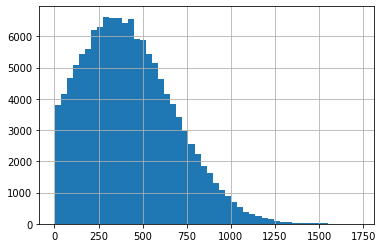

In [168]:
internet['mb_used'].hist(bins=50)

## Заменим тип данных в столбцах с датой

Во всех таблицах кроме tariffs тип данных столбцов с датой указан как обьект. Необходимо заменить его не дату. Также надо добавить столбец месяц для дальнейших расчётов.

In [169]:
def change_date(dataframes): #функция для изменения типа данных и добавлении номера месяца
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)  

In [170]:
change_date([calls,internet,messages,users])

In [171]:
for data in [calls, internet, messages, users]: #проверяю, как отработала функция
    print(data.head())

       id  call_date  duration  user_id  month
0  1000_0 2018-07-25       NaN     1000      7
1  1000_1 2018-08-17       NaN     1000      8
2  1000_2 2018-06-11       3.0     1000      6
3  1000_3 2018-09-21      14.0     1000      9
4  1000_4 2018-12-15       6.0     1000     12
   Unnamed: 0      id  mb_used session_date  user_id  month
0           0  1000_0    113.0   2018-11-25     1000     11
1           1  1000_1   1053.0   2018-09-07     1000      9
2           2  1000_2   1198.0   2018-06-25     1000      6
3           3  1000_3    551.0   2018-08-22     1000      8
4           4  1000_4    303.0   2018-09-24     1000      9
       id message_date  user_id  month
0  1000_0   2018-06-27     1000      6
1  1000_1   2018-10-08     1000     10
2  1000_2   2018-08-04     1000      8
3  1000_3   2018-06-16     1000      6
4  1000_4   2018-12-05     1000     12
   user_id  age churn_date         city first_name  last_name   reg_date  \
0     1000   52        NaN    Краснодар     Рафа

# Посчитаем для каждого пользователя

Количество звонков и израсходованных минут по месяцам

In [172]:
count_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum'])
display(count_calls)

count    sum
user_id month              
1000    5         17  159.0
        6         28  172.0
        7         41  340.0
        8         42  408.0
        9         46  466.0
...              ...    ...
1498    10        30  247.0
1499    9          8   70.0
        10        44  449.0
        11        62  612.0
        12        56  492.0

[3174 rows x 2 columns]

Количество отправленных сообщений по месяцам

In [173]:
count_messages=messages.groupby(['user_id','month'])['message_date'].count()
display(count_messages)


user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
                  ..
1498     10       42
1499     9        11
         10       48
         11       59
         12       66
Name: message_date, Length: 2717, dtype: int64

Oбъем израсходованного интернет-трафика по месяцам

In [174]:
count_internet=internet.groupby(['user_id','month'])['mb_used'].sum()
display(count_internet)

user_id  month
1000     5         2256.0
         6        23257.0
         7        14016.0
         8        14070.0
         9        14581.0
                   ...   
1498     10       20604.0
1499     9         1848.0
         10       17809.0
         11       17984.0
         12       13077.0
Name: mb_used, Length: 3203, dtype: float64

Соединю эти три таблицы в одну

In [175]:
new = count_calls.merge(count_messages, on=['user_id','month'])
display(new)

count    sum  message_date
user_id month                            
1000    5         17  159.0            22
        6         28  172.0            60
        7         41  340.0            75
        8         42  408.0            81
        9         46  466.0            57
...              ...    ...           ...
1498    10        30  247.0            42
1499    9          8   70.0            11
        10        44  449.0            48
        11        62  612.0            59
        12        56  492.0            66

[2678 rows x 3 columns]

In [176]:
new2 = new.merge(count_internet, on=['user_id','month'])
display(new2)

count    sum  message_date  mb_used
user_id month                                     
1000    5         17  159.0            22   2256.0
        6         28  172.0            60  23257.0
        7         41  340.0            75  14016.0
        8         42  408.0            81  14070.0
        9         46  466.0            57  14581.0
...              ...    ...           ...      ...
1498    10        30  247.0            42  20604.0
1499    9          8   70.0            11   1848.0
        10        44  449.0            48  17809.0
        11        62  612.0            59  17984.0
        12        56  492.0            66  13077.0

[2667 rows x 4 columns]

Добавляю столбец tariff из users

In [177]:
new3=new2.merge(users, on=['user_id']) 
new3.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns', inplace=True)
new3.columns=['User_id', 'Кол-во звонков', 'Время звонков,мин', 
                            'смс', 'Интернет,мб', 'Город', 'Тариф','Месяц']
display(new3)

,User_id,Кол-во звонков,"Время звонков,мин",смс,"Интернет,мб",Город,Тариф,Месяц
0,1000,17,159.0,22,2256.0,Краснодар,ultra,5
1,1000,28,172.0,60,23257.0,Краснодар,ultra,5
2,1000,41,340.0,75,14016.0,Краснодар,ultra,5
3,1000,42,408.0,81,14070.0,Краснодар,ultra,5
4,1000,46,466.0,57,14581.0,Краснодар,ultra,5
...,...,...,...,...,...,...,...,...
2662,1498,30,247.0,42,20604.0,Владикавказ,smart,7
2663,1499,8,70.0,11,1848.0,Пермь,smart,9
2664,1499,44,449.0,48,17809.0,Пермь,smart,9
2665,1499,62,612.0,59,17984.0,Пермь,smart,9


In [178]:
new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 8 columns):
User_id              2667 non-null int64
Кол-во звонков       2667 non-null int64
Время звонков,мин    2667 non-null float64
смс                  2667 non-null int64
Интернет,мб          2667 non-null float64
Город                2667 non-null object
Тариф                2667 non-null object
Месяц                2667 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 187.5+ KB


Помесячная выручка с каждого пользователя:

 Создаю словарь, чтобы добавить столбец Абонентская плата

In [179]:
month_price = {'smart': 550, 'ultra': 1950}
new3['Аб.плата,руб'] = new3['Тариф'].map(month_price)

Функции, чтобы посчитать превышения тарифов

In [180]:
def calls_over_tariff(row):
    if row['Тариф'] == 'smart':
        result = row['Время звонков,мин'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Время звонков,мин'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over_tariff(row):
    if row['Тариф'] == 'smart':
        result = row['смс'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['смс'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over_tariff(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет,мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет,мб'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_profit(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month += np.ceil(row['Минуты сверх']) * 3
        sum_per_month += row['смс сверх'] * 3
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Минуты сверх']) * 1
        sum_per_month += row['смс сверх'] * 1
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 150
        return sum_per_month

Cоздаю новые столбцы:

In [181]:
new3['Минуты сверх'] = new3.apply(calls_over_tariff, axis=1)
new3['смс сверх'] = new3.apply(sms_over_tariff, axis=1)
new3['Мб сверх'] = new3.apply(internet_over_tariff, axis=1)

new3['Плата сверх лимита,руб'] = new3.apply(month_profit, axis=1)

for column in ['Минуты сверх', 'Мб сверх']:
    new3[column] = new3[column].astype('float')

for column in ['смс сверх', 'Плата сверх лимита,руб']:
    new3[column] = new3[column].astype('int')

In [182]:
display(new3)

,User_id,Кол-во звонков,"Время звонков,мин",смс,"Интернет,мб",Город,Тариф,Месяц,"Аб.плата,руб",Минуты сверх,смс сверх,Мб сверх,"Плата сверх лимита,руб"
0,1000,17,159.0,22,2256.0,Краснодар,ultra,5,1950,0.0,0,0.0,0
1,1000,28,172.0,60,23257.0,Краснодар,ultra,5,1950,0.0,0,0.0,0
2,1000,41,340.0,75,14016.0,Краснодар,ultra,5,1950,0.0,0,0.0,0
3,1000,42,408.0,81,14070.0,Краснодар,ultra,5,1950,0.0,0,0.0,0
4,1000,46,466.0,57,14581.0,Краснодар,ultra,5,1950,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,30,247.0,42,20604.0,Владикавказ,smart,7,550,0.0,0,5244.0,1200
2663,1499,8,70.0,11,1848.0,Пермь,smart,9,550,0.0,0,0.0,0
2664,1499,44,449.0,48,17809.0,Пермь,smart,9,550,0.0,0,2449.0,600
2665,1499,62,612.0,59,17984.0,Пермь,smart,9,550,112.0,9,2624.0,963


Добавлю столбец Плата за месяц:

In [183]:
new3['Плата за месяц,руб'] = new3['Аб.плата,руб'] + new3['Плата сверх лимита,руб']
display(new3)

,User_id,Кол-во звонков,"Время звонков,мин",смс,"Интернет,мб",Город,Тариф,Месяц,"Аб.плата,руб",Минуты сверх,смс сверх,Мб сверх,"Плата сверх лимита,руб","Плата за месяц,руб"
0,1000,17,159.0,22,2256.0,Краснодар,ultra,5,1950,0.0,0,0.0,0,1950
1,1000,28,172.0,60,23257.0,Краснодар,ultra,5,1950,0.0,0,0.0,0,1950
2,1000,41,340.0,75,14016.0,Краснодар,ultra,5,1950,0.0,0,0.0,0,1950
3,1000,42,408.0,81,14070.0,Краснодар,ultra,5,1950,0.0,0,0.0,0,1950
4,1000,46,466.0,57,14581.0,Краснодар,ultra,5,1950,0.0,0,0.0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,30,247.0,42,20604.0,Владикавказ,smart,7,550,0.0,0,5244.0,1200,1750
2663,1499,8,70.0,11,1848.0,Пермь,smart,9,550,0.0,0,0.0,0,550
2664,1499,44,449.0,48,17809.0,Пермь,smart,9,550,0.0,0,2449.0,600,1150
2665,1499,62,612.0,59,17984.0,Пермь,smart,9,550,112.0,9,2624.0,963,1513


In [184]:
tarif_smart = new3.query('Тариф == "smart"')
len(tarif_smart.groupby('User_id'))



301

In [185]:
tarif_ultra = new3.query('Тариф == "ultra"')
len(tarif_ultra.groupby('User_id'))


118

После всех операций в таблице оказалось 118 абонентов тарима Ультра и 301 абонент тарифа Смарт

# Анализ данных

Для удобства дальнейших действий добавлю столбец "Не хватило тарифа"

In [186]:
new3['Не хватило тарифа'] = np.where(new3['Плата сверх лимита,руб'] > 0, 1, 0)
new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 15 columns):
User_id                   2667 non-null int64
Кол-во звонков            2667 non-null int64
Время звонков,мин         2667 non-null float64
смс                       2667 non-null int64
Интернет,мб               2667 non-null float64
Город                     2667 non-null object
Тариф                     2667 non-null object
Месяц                     2667 non-null int64
Аб.плата,руб              2667 non-null int64
Минуты сверх              2667 non-null float64
смс сверх                 2667 non-null int64
Мб сверх                  2667 non-null float64
Плата сверх лимита,руб    2667 non-null int64
Плата за месяц,руб        2667 non-null int64
Не хватило тарифа         2667 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 333.4+ KB


Cделаю круговые диаграммы для каждого тарифа:

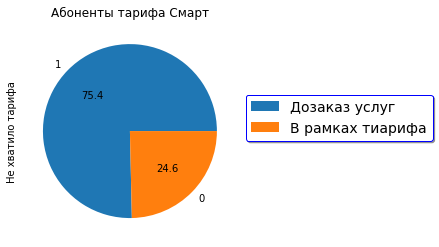

In [187]:
tarif_smart = new3.query('Тариф == "smart"')
tarif_smart['Не хватило тарифа'].value_counts().plot(kind='pie', subplots=True, autopct='%.1f')
plt.title("Абоненты тарифа Смарт")
plt.legend(['Дозаказ услуг', 'В рамках тиарифа'], loc='upper left', bbox_to_anchor=(1.0, 0.7), fontsize=14, shadow=True, framealpha=1, edgecolor='b')
plt.show()


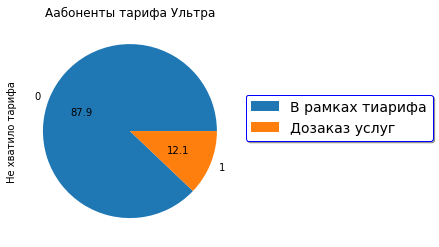

In [188]:
tarif_ultra = new3.query('Тариф == "ultra"')
tarif_ultra['Не хватило тарифа'].value_counts().plot(kind='pie', subplots=True, autopct='%.1f')
plt.title("Аабоненты тарифа Ультра")
plt.legend(['В рамках тиарифа', 'Дозаказ услуг'], loc='upper left', bbox_to_anchor=(1.0, 0.7), fontsize=14, shadow=True, framealpha=1, edgecolor='b')
plt.show()

На диаграммах видно, что большинство абонентов тарифа Ультра (87.9%) остаются в рамках пакета и только 12.1% людей дозаказывают дополнительные минуты, мегабайты и смс. 
У тарифа Смарт ситуацию обратная - почти все пользователи (75,4%) дозаказывают сверх пакета и только 24.6% людей отсаются в рамках тарифа.

Построю гистограмму переплат:

для тарифа Смарт:

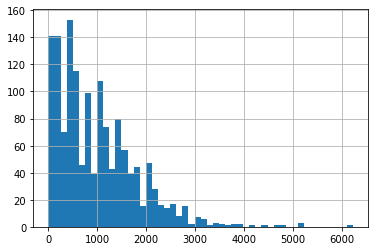

In [189]:
pereplata_smart = new3[(new3['Тариф'] == 'smart') & 
                                       (new3['Плата сверх лимита,руб'] > 0)]['Плата сверх лимита,руб']
pereplata_smart.hist(bins=50)
#tarif_smart.query('Плата сверх лимита,руб>0')['Плата сверх лимита,руб'].hist(bins=100)


Из тех, кто переплавчивает, большинство переплачивает до 1500р. Посмотрю поближе:

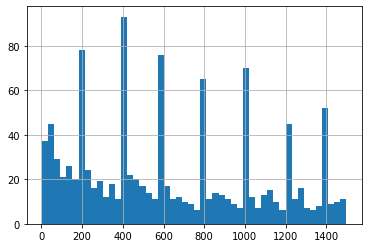

In [190]:
pereplata_smart_do_1500 = new3[(new3['Тариф'] == 'smart') & 
                                        (new3['Плата сверх лимита,руб'] > 0) &
                                        (new3['Плата сверх лимита,руб'] < 1500)]['Плата сверх лимита,руб']
pereplata_smart_do_1500.hist(bins=50)

Из тех, кто переплачивает, большинство переплачивают сумму кратную 200р. Это означает, что они докупают 1Гб разное количество раз.

Для тарифа Ультра:

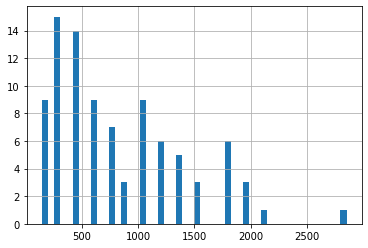

In [191]:
pereplata_ultra = new3[(new3['Тариф'] == 'ultra') & 
                                       (new3['Плата сверх лимита,руб'] > 0)]['Плата сверх лимита,руб']
pereplata_ultra.hist(bins=50)

Из тех, кто переплавчивает, большинство переплачивает до 1500р. Посмотрю поближе:

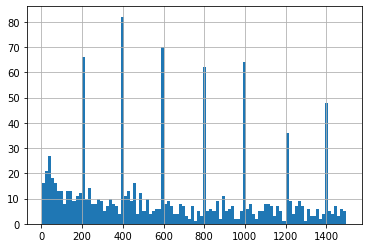

In [192]:
pereplata_ultra_do_1500 = new3[(new3['Тариф'] == 'smart') & 
                                        (new3['Плата сверх лимита,руб'] > 0) &
                                        (new3['Плата сверх лимита,руб'] < 1500)]['Плата сверх лимита,руб']
pereplata_ultra_do_1500.hist(bins=100)

Абоненты покупают 1Гб сверх тарифа

Посмотрю какие опции чаще дозаказывают:

In [193]:
new3.groupby('Тариф').sum()[['Минуты сверх','смс сверх','Мб сверх']].reset_index()

,Тариф,Минуты сверх,смс сверх,Мб сверх
0,smart,79738.0,12928,5286268.0
1,ultra,0.0,0,466125.0


Абоненты Смарта дозаказывают все имеющиеся опции, абоненты Ультра дозаказывают только гигабайты.

Построю диаграмму выручки по каждому тарифу:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f65e1199850>],
      dtype=object)

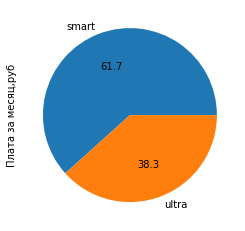

In [194]:
revenue=new3.groupby('Тариф')['Плата за месяц,руб'].sum()
revenue.plot(kind='pie', subplots=True, autopct='%.1f')

Тариф Смарт приносит 61.7% выручки, а Ультра 38.3%

Построю сводную таблицу по тарифам:

In [195]:
display(new3.pivot_table(index='Тариф', values=('Аб.плата,руб', 'Время звонков,мин', 'Интернет,мб', 'смс', 'Плата за месяц,руб'), aggfunc='sum'))

,"Аб.плата,руб","Время звонков,мин","Интернет,мб","Плата за месяц,руб",смс
Тариф,,,,,
smart,1053250,806282.0,31149607.0,2480648,74239
ultra,1466400,418757.0,14750172.0,1541400,46354


# Вывод

# Дисперсия и стандартное отклонение

### Минуты разговора:

In [196]:
tarif_smart['Время звонков,мин'].describe()

count    1915.000000
mean      421.034987
std       187.712806
min         0.000000
25%       287.500000
50%       427.000000
75%       547.000000
max      1435.000000
Name: Время звонков,мин, dtype: float64

In [197]:
tarif_ultra['Время звонков,мин'].describe()

count     752.000000
mean      556.857713
std       311.862810
min         0.000000
25%       331.750000
50%       537.500000
75%       760.250000
max      1673.000000
Name: Время звонков,мин, dtype: float64

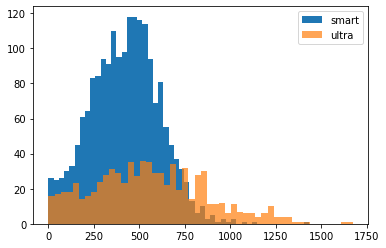

In [198]:
plt.hist(tarif_smart['Время звонков,мин'], bins=50, label='smart')
plt.hist(tarif_ultra['Время звонков,мин'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [199]:
smart_var = np.var(tarif_smart['Время звонков,мин'], ddof=1) #дисперсия тарифа Смарт
smart_var

35236.09752135563

In [200]:
ultra_var = np.var(tarif_ultra['Время звонков,мин'], ddof=1) #дисперсия тарифа Ультра
ultra_var

97258.41248370968

In [201]:
s=smart_var**0.5 #считаю стандартное отклонение
u=ultra_var**0.5
data={'Метрика':['Дисперсия','Стандартное отклонение'],'Смарт':['35236.1',s],'Ультра':['97258.4',u]}
df = pd.DataFrame(data)
df

,Метрика,Смарт,Ультра
0,Дисперсия,35236.1,97258.4
1,Стандартное отклонение,187.713,311.863


На тарифе смарт люди  основном разгоавривают 250-550 минут. В среднем 421 минуту, то есть почти полностью проговаривают отведенные минуты. На тарифе Ультра гораздо реже разговаривают по сотовой связи, возможно используют звонки через интернет.

### Сообщения:

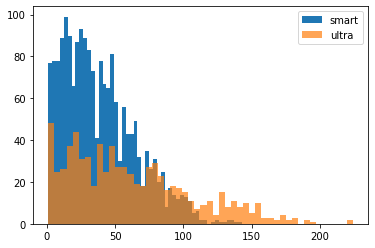

In [202]:
plt.hist(tarif_smart['смс'], bins=50, label='smart')
plt.hist(tarif_ultra['смс'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [203]:
smart_var1 = np.var(tarif_smart['смс'], ddof=1) #дисперсия тарифа Смарт
smart_var1

718.8036193391555

In [204]:
ultra_var1 = np.var(tarif_ultra['смс'], ddof=1) #дисперсия тарифа Ультра
ultra_var1

2008.5500113324078

In [205]:
s1=smart_var1**0.5 #считаю стандартное отклонение
u1=ultra_var1**0.5
data1={'Метрика':['Дисперсия','Стандартное отклонение'],'Смарт':['718.8',s1],'Ультра':['2008.5',u1]}
df1 = pd.DataFrame(data1)
df1

,Метрика,Смарт,Ультра
0,Дисперсия,718.8,2008.5
1,Стандартное отклонение,26.8105,44.8168


Большинство абонентов тарифа Смарт используют 20-30 смс. На тарифе ультра смс используют в два раза реже, что ожидаемо.

### Трафик

In [206]:
tarif_smart['Интернет,мб'].describe()

count     1915.000000
mean     16266.113316
std       5800.037364
min          0.000000
25%      12640.000000
50%      16484.000000
75%      20068.000000
max      38610.000000
Name: Интернет,мб, dtype: float64

In [207]:
tarif_ultra['Интернет,мб'].describe()

count      752.000000
mean     19614.590426
std       9638.192361
min          0.000000
25%      11917.000000
50%      19463.500000
75%      26854.750000
max      49789.000000
Name: Интернет,мб, dtype: float64

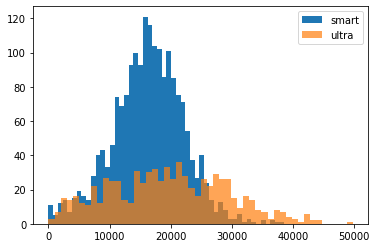

In [208]:
plt.hist(tarif_smart['Интернет,мб'], bins=50, label='smart')
plt.hist(tarif_ultra['Интернет,мб'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [209]:
smart_var2 = np.var(tarif_smart['Интернет,мб'], ddof=1) #дисперсия тарифа Смарт
smart_var2

33640433.42027714

In [210]:
ultra_var2 = np.var(tarif_ultra['Интернет,мб'], ddof=1) #дисперсия тарифа Ультра
ultra_var2

92894751.98382299

In [211]:
s2=smart_var2**0.5 #считаю стандартное отклонение
u2=ultra_var2**0.5
data2={'Метрика':['Дисперсия','Стандартное отклонение'],'Смарт':['33640433.4',s2],'Ультра':['92894751.9',u2]}
df2 = pd.DataFrame(data2)
df2

,Метрика,Смарт,Ультра
0,Дисперсия,33640433.4,92894751.9
1,Стандартное отклонение,5800.04,9638.19


# Проверяем гипотезы

#### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

H0 (нулевая гипотеза) - средняя выручка пользователей тарифа Смарт не отличается от средней выручки пользователей тарифа Ультра

Н1 (альтернативная гипотеза) - средняя выручка пользователей тарифа Смарт отличается от средней выручки пользователей тарифа Ультра.

In [212]:
alpha = .05 #пороговое значение в 5%

results = st.ttest_ind(                     #выборки независимые, поэтому использую ttest_ind
    tarif_smart['Плата за месяц,руб'], 
    tarif_ultra['Плата за месяц,руб'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.8999704774515e-118
Отвергаем нулевую гипотезу


Cредняя выручка пользователей тарифов "Ультра" и "Смарт" действительно различается и наша гипотеза подтвердилась.

#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0 (нулевая гипотеза) - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Н1 (альтернативная гипотеза) - средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов.

In [213]:
msk = new3.query('Город == "Москва"')['Плата за месяц,руб']
region = new3.query('Город != "Москва"')['Плата за месяц,руб']
               
alpha = .05 #пороговое значение в 5%

results = st.ttest_ind(msk,region)     #выборки независимые, поэтому использую ttest_ind
print('р-значение:', results.pvalue)
                    
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')                    

р-значение: 0.12342138090776787
Не получилось отвергнуть нулевую гипотезу


# Общий вывод

Из двух гипотез подтвердилась только первая - "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

Тариф Смарт приносит 62% выручки, а Ультра 38%
Таким образом есть дешевый тариф Смарт за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита.Среднему пользователю не хватает 2 Гб интернета и ему приходится дозаказывать эти 2 Гб и доплачивать за них 400 рублей, и есть тариф Ультра, стоимостью 1950 рублей, где лимитов по всем типам связи достаточно, но иногда дозаказывают в среднем 1 Гб интернета за 150 рублей.